### This is a library to find the best performing configuration from a set of dimensions (i.e. schemas, partition, storage) which can be specified inside the <b>settings.yaml</b> file in the resource

In [ ]:
%pip install PAPyA==0.1.0

### Load the configuration file and log files location for the experiment

<p>Configurations for SP2Bench Data</p>

In [ ]:
config_sp2bench = "settings.yaml" # config file location
logs_sp2bench = "log" # logs file location

<p>Configurations for Watdiv Data</p>

In [1]:
config_watdiv = "settings_watdiv.yaml" # config file location
logs_watdiv = "log_watdiv" # logs file location

#### <u>Configuration file</u> <br>
The configuration file is a yaml data-serialization language which has two main parts, the dimensions and the number of query experiments. You can add more dimensions here or change these existing dimensions to anything you need

<i>Example :</i> 
```yaml
dimensions:
    schemas: ["st", "vt", "pt", "extvt", "wpt"]
    partition: ["horizontal", "predicate", "subject"]
    storage: ["csv", "avro", "parquet", "orc"]

query: 11
```

#### <u>Log file structure</u> <br>
the structure of the log files must follow the order of dimensions in the configuration file (i.e. {schemas}.{partition}.{storage}.txt) and the subfolders should be the ranking sets of the experiments (i.e. dataset sizes)

<i>Example :</i>
```
UI Module
└───log
    │
    |───100M
    |    │   st.horizontal.csv.txt
    |    │   st.horizontal.avro.txt
    |    │   ...
    │
    └───250M
        |   st.horizontal.csv.txt
        │   st.horizontal.avro.txt
        │   ...
```

### Single Dimensional Ranking

<b>SDRank</b> is a class module from PAPyA library to calculate ranking score _R_ for each dimension independently that operates over a log-based structure that user specified on the configuration file.<br> 
The value of _R_ represents the performance of a particular configuration (higher value means better performing configuration). We used Ranking Function _R_ below to calculate the rank scores:

$$R =\sum \limits _{r=1} ^{d} \frac{O_{dim} * (d-r)}{|Q| * (d-1)}, 0<R<=1$$

$d$         : total number of parameters (options) in a particular dimension<br>
$O_{dim}$   : number of occurences of the dimension placed at rank $r$ (Rank 1, Rank 2, Rank 3, ...)<br>
$|Q|$       : total number of queries

### PAPyA.Rank.SDRank

#### <i>class</i> Rank.<b>SDRank</b>(<i>config_path, log_path, ranking_sets, dimension</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>
&emsp;<b>dimension : str</b><br>
&emsp;&emsp;<small>A single dimension to be ranked. <i>i.e schemas</small></i><br>


In [2]:
# this class takes single dimension and dataset sizes as parameters that user specified inside their log files
from Rank import SDRank

schemaSDRank = SDRank(config_watdiv, logs_watdiv, '100M', 'schemas')
partitionSDRank = SDRank(config_watdiv, logs_watdiv, '250M', 'partition')
storageSDRank = SDRank(config_watdiv, logs_watdiv, '250M', 'storage')

### Rank.SDRank.calculateRank

#### SDRank.<b>calculateRank</b>(<i>*args</i>)
<small>The function that automates calculating the rank scores of a single dimension using the Ranking Function above.</small><br><br>
<small>Returns a table of configurations which is sorted based on the best performing configuration according to their Ranking Score along with number of occurences of the dimension being placed at the rank _r_ (1st, 2nd, 3rd, ...)</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>*args : str or list</b><br>
&emsp;&emsp;<small>This method takes an arbitrary number of parameters of strings and lists.<br>
&emsp;&emsp;&ensp;str -> slice the table according to string input. <i>i.e. "predicate" will slice the table by the <b>predicate</b> partitioning</i><br>
&emsp;&emsp;&ensp;list -> remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i><br>


In [3]:
from PAPyA.file_reader import FileReader
FileReader(config_watdiv, logs_watdiv, '100M', 'schemas').file_reader()
# SDRank(config_watdiv, logs_watdiv, '100M', 'schemas')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
wpt.horizontal.orc,146.651834,162.349280,107.103639,49.960609,4.897310,137.597456,123.489869,126.356856,51.734231,2.021613,1.485276,1.475116,1.179094,96.953134,1.635209,1.798740,1.689067,1.583253,1.537363,88.555925
extvp.horizontal.orc,28.317974,8.380679,16.356181,3.699681,3.849585,6.759247,7.037816,8.952976,2.713537,2.034422,2.774800,1.886937,2.354927,7.321082,3.143353,3.761165,4.081184,3.824393,2.925221,3.211407
pt.horizontal.orc,37.031554,23.996726,13.437864,5.076646,1.753417,5.917714,9.107865,4.531680,3.021133,1.744814,7.243586,4.113663,1.664544,11.142699,3.595029,3.822973,1.595811,0.895096,2.323493,2.564751
vp.horizontal.orc,40.746580,16.365281,20.026636,10.442703,12.526284,8.359064,12.807408,13.336649,2.950071,1.980077,6.877400,1.409394,1.752933,20.184179,6.849186,7.238274,5.789324,2.978065,11.232495,10.177700
st.horizontal.orc,54.850234,31.430518,22.319936,9.725038,11.954771,8.571278,11.896514,7.208464,14.454267,6.091672,3.317276,3.543872,4.368454,9.858340,6.721644,5.291964,6.246700,5.650803,3.761176,3.978417
wpt.horizontal.avro,146.651834,162.349280,107.103639,118.896094,8.890335,493.028916,469.171816,463.201779,371.983006,6.075541,3.831184,3.931581,5.988639,377.183561,3.920705,4.168374,6.356769,3.957374,3.950182,372.676431
extvp.horizontal.avro,26.618640,8.444572,14.418154,3.123257,4.607576,6.185818,6.291835,9.989657,2.502394,2.099777,2.671073,1.338125,1.831335,8.035592,3.490572,1.990649,1.689901,2.503066,2.912707,3.250969
pt.horizontal.avro,35.257396,28.024908,15.099307,4.912845,1.681356,6.625473,8.808964,5.672481,3.089868,2.439226,7.030874,4.625830,1.441206,5.939075,4.285603,3.678321,1.366619,1.168820,1.438073,2.279930
vp.horizontal.avro,36.871979,17.286214,21.500731,10.791886,12.151588,9.666248,12.089838,15.661975,2.798334,2.218868,6.267041,1.797145,2.306896,14.233546,5.343544,5.085885,5.284333,3.026261,8.682553,8.686543
st.horizontal.avro,63.850391,50.918349,37.732766,26.615154,31.863258,24.470381,36.341714,24.316141,22.844314,14.691997,10.593254,10.822220,13.655790,35.586508,18.391621,17.850800,18.131226,17.423713,13.269315,13.560959


In [4]:
# single dimension ranking by storage without excluding queries
storageSDRank.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
st.horizontal.orc,18.0,2.0,0.0,0.0,0.966667
wpt.horizontal.parquet,17.0,0.0,0.0,3.0,0.850000
extvp.horizontal.csv,16.0,1.0,0.0,3.0,0.833333
pt.horizontal.parquet,6.0,13.0,1.0,0.0,0.750000
vp.horizontal.csv,12.0,3.0,1.0,4.0,0.716667
st.horizontal.parquet,2.0,18.0,0.0,0.0,0.700000
wpt.horizontal.orc,0.0,17.0,0.0,3.0,0.566667
vp.horizontal.orc,4.0,4.0,9.0,3.0,0.483333
extvp.horizontal.avro,0.0,11.0,6.0,3.0,0.466667
vp.horizontal.avro,2.0,7.0,7.0,4.0,0.450000


In [ ]:
# single dimension ranking by storage excluding query 7,8,and 9
excludeQuery = [7,8,9]
storageSDRank.calculateRank(excludeQuery)

In [ ]:
# slicing partition single dimension ranking by predicate partitioning
partitionSDRank.calculateRank('horizontal')

In [ ]:
# slicing schema single dimension ranking by predicate partitioning and csv storage format while excluding some queries
schemasSDRank.calculateRank('predicate', 'csv', [3,4,5])

### Rank.SDRank.plotRadar

#### SDRank.<b>plotRadar</b>()

<small>Ranking over one dimension is insufficient when it counts multiple dimensions. The presence of trade-offs reduces the accuracy of single dimension ranking functions which could be seen in the radar plot below.</small><br><br>
<small>This method returns a radar chart that shows the presence of trade-offs by using the single dimension ranking criterion that reduces the accuracy of the other dimensions</small>

In [ ]:
# This example shows a figure of the top configuration of ranking by schema is optimized towards its dimension only, ignoring the other two dimension.
from Rank import SDRank
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plotRadar()

### Rank.SDRank.plot

#### SDRank.<b>plot</b>(<i>view</i>)
<small>In addition to radar plot, PAPyA also provides visualization that shows the performance of a single dimension parameters that user can choose in terms of their rank scores</small><br><br>
<small>This method returns a bar chart that shows a particular dimension rankings, pivoting another dimension by user viewing projection</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>view : str</b><br>
&emsp;&emsp;<small>This method takes a string of dimensional option that user choose to view as projection</small><br><br>
<i>Example:</i><br>
&emsp;&emsp;<small>_Schemas_ single dimensional ranking viewed from _Predicate Partitioning_ by pivoting over the _Storage_ dimension</small>


<AxesSubplot:title={'center':'Schemas SD Rank pivoting Storage formats for Predicate Partition'}>

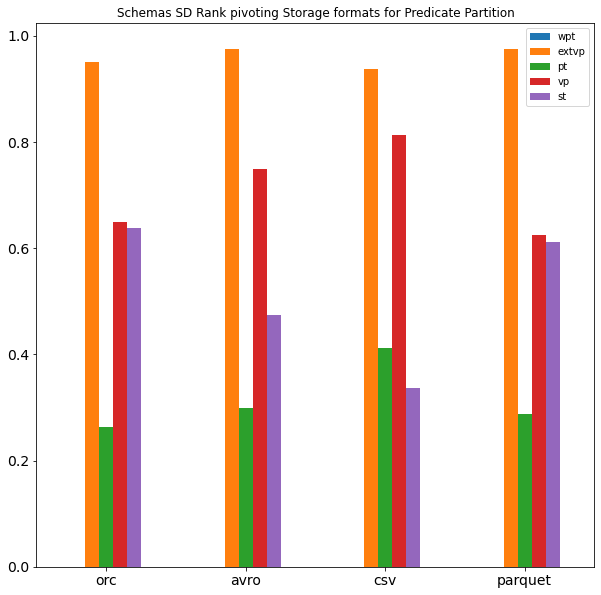

In [22]:
from Rank import SDRank
# example of schema dimension plots

SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('predicate')

In [ ]:
config = "settings_watdiv.yaml" # config file location
logs = "log_watdiv" # logs file location

from Rank import SDRank

queries = ['Q11', 'Q14']
schemaSDRank = SDRank(config, logs, '100M', 'schemas').plotBox(queries)

In [15]:
# example of MDRank class with 100M dataset size as ranking set of the experiment
from Rank import MDRank

config = "settings_watdiv.yaml"
logs = "log_watdiv"

multiDimensionRank = MDRank(config, logs, '100M')

In [12]:
# this is the top 5 configurations according to paretoQ method sorted from best to worst
multiDimensionRank.paretoQ()

,Solution,Dominated
0,extvp.predicate.csv,vp.horizontal.avro
1,extvp.predicate.orc,st.subject.orc
2,extvp.horizontal.csv,st.predicate.orc
3,pt.horizontal.parquet,vp.predicate.orc
4,pt.subject.csv,st.predicate.parquet
5,extvp.subject.csv,vp.predicate.parquet
6,extvp.predicate.parquet,wpt.subject.orc
7,pt.subject.avro,st.subject.parquet
8,pt.horizontal.csv,wpt.horizontal.orc
9,pt.horizontal.avro,st.horizontal.orc


In [16]:
# this is the top 5 configurations according to paretoAgg method sorted from best to worst
multiDimensionRank.paretoAgg()

,Solution,Dominated
0,vp.predicate.csv,wpt.predicate.orc
1,pt.horizontal.csv,st.horizontal.csv
2,extvp.predicate.parquet,wpt.subject.csv
3,st.subject.orc,st.horizontal.avro
4,vp.subject.csv,pt.predicate.orc
5,extvp.predicate.orc,pt.predicate.avro
6,pt.subject.csv,vp.subject.parquet
7,,st.subject.csv
8,,pt.predicate.parquet
9,,wpt.horizontal.csv


The <b>plot</b> method shows the solutions for _paretoAgg_ as shades of green areas projected in a three dimensional space

(7, 3) (50, 3)


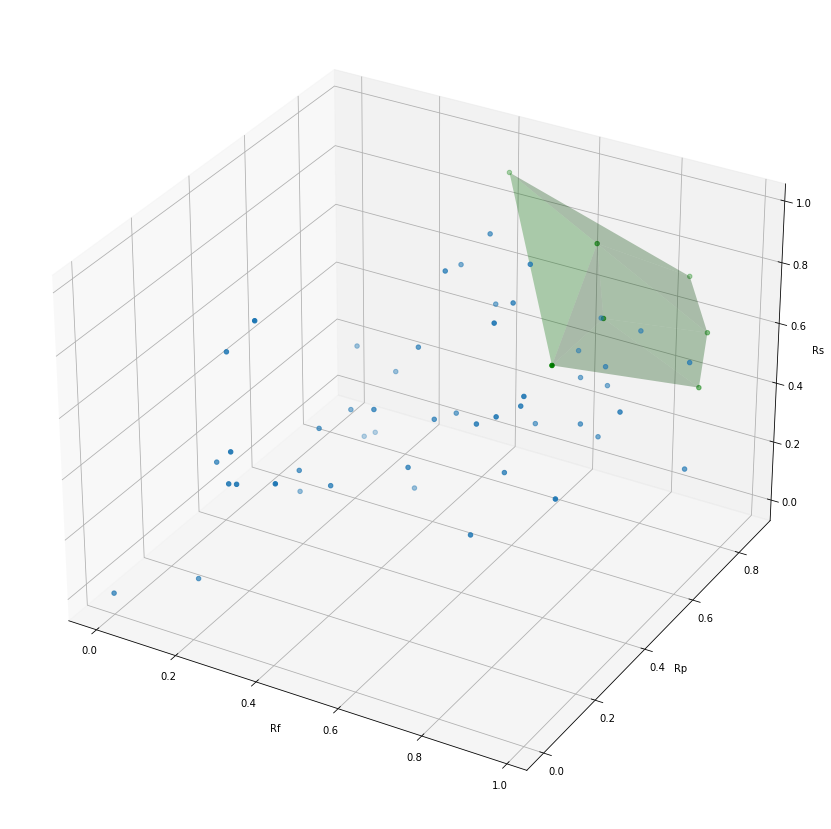

In [21]:
multiDimensionRank.plot()

In [10]:
# both conformance and coherence classes takes a list of ranking criterion that the user can specify
from Ranker import Conformance, Coherence

config = 'settings_watdiv.yaml'
logs = 'log_watdiv'

conformance_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']
coherence_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']

conf = Conformance(config, logs, '100M', conformance_set, 5, 28)
coh = Coherence(config, logs,coherence_set)

In [ ]:
conf.run()

In [20]:
conf.configurationQueryRanks(dimension = 'paretoAgg', mode=1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.csv,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
vp.subject.csv,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
extvp.predicate.parquet,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
pt.horizontal.csv,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False
st.subject.orc,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False


In [ ]:
coh.run('250M', '500M')

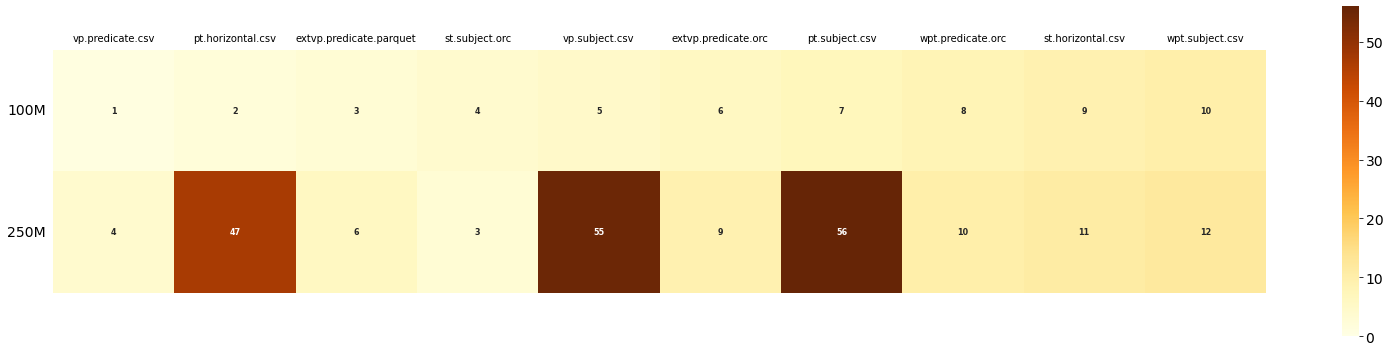

In [18]:
# only takes single dimensions
coh.heatMap('100M', "250M", dimension='paretoAgg')

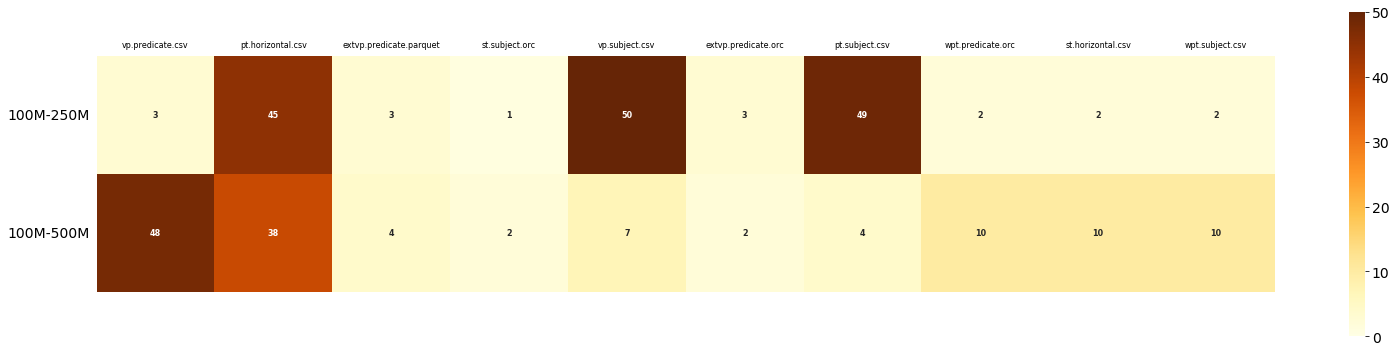

In [17]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='paretoAgg')

In [ ]:
import ahpy

query_comparison = {('Q1', 'Q2'): 1/7, ('Q1', 'Q3'): 1, ('Q1', 'Q4'): 1/9, ('Q1', 'Q5'): 1/3,
                    ('Q1', 'Q6'): 1/5, ('Q1', 'Q7'): 1/7, ('Q1', 'Q8'): 1/9, ('Q1', 'Q9'): 1/3, ('Q1', 'Q10'): 1, ('Q1', 'Q11'): 1,
                    ('Q2', 'Q3'): 7, ('Q2', 'Q4'): 1/9, ('Q2', 'Q5'): 3,
                    ('Q2', 'Q6'): 5, ('Q2', 'Q7'): 1, ('Q2', 'Q8'): 1/9, ('Q2', 'Q9'): 3, ('Q2', 'Q10'): 7, ('Q2', 'Q11'): 7,
                    ('Q3', 'Q4'): 1/9, ('Q3', 'Q5'): 1/3,
                    ('Q3', 'Q6'): 1/5, ('Q3', 'Q7'): 1/7, ('Q3', 'Q8'): 1/9, ('Q3', 'Q9'): 1/3, ('Q3', 'Q10'): 1, ('Q3', 'Q11'): 1,
                    ('Q4', 'Q5'): 3,
                    ('Q4', 'Q6'): 5, ('Q4', 'Q7'): 7, ('Q4', 'Q8'): 1, ('Q4', 'Q9'): 3, ('Q4', 'Q10'): 9, ('Q4', 'Q11'): 9,
                    ('Q5', 'Q6'): 1/5, ('Q5', 'Q7'): 1/7, ('Q5', 'Q8'): 1/9, ('Q5', 'Q9'): 1, ('Q5', 'Q10'): 3, ('Q5', 'Q11'): 3,
                    ('Q6', 'Q7'): 1/7, ('Q6', 'Q8'): 1/9, ('Q6', 'Q9'): 3, ('Q6', 'Q10'): 5, ('Q6', 'Q11'): 5,
                    ('Q7', 'Q8'): 1/9, ('Q7', 'Q9'): 3, ('Q7', 'Q10'): 7, ('Q7', 'Q11'): 7,
                    ('Q8', 'Q9'): 3, ('Q8', 'Q10'): 9, ('Q8', 'Q11'): 9,
                    ('Q9', 'Q10'): 3, ('Q9', 'Q11'): 3,
                    ('Q10', 'Q11'): 1,}

queries = ahpy.Compare(name='Queries', comparisons=query_comparison, precision=3, random_index='saaty')

print(queries.target_weights)

print(queries.consistency_ratio)